##Project Summary

<img src ='https://images.unsplash.com/photo-1548859047-1d15def63a14?ixlib=rb-1.2.1&ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&auto=format&fit=crop&w=2700&q=80' width="1000" height = "200">)
###### Ivy(Ruxin) Tong | November 15th, 2020 | Image courtesy of Ivan Olenkevich

#####Objective : Address the Challenge of Evaluation and Prediction of American’s Mobility under Extreme Weather Events.

#####  Datasets :  Weather_CBG_2019 | Social Distancing Metrics v2.1 
######  About the data
- Dataset - Weather_CBG_2019 records daily weather parameters by census block group in the United States. There're 7 variables. 

| <DBR> Variable   | Description  | Units | 
|-----------------  |---------------|------|
| geoid    | census block group ID |  | 
| precip  | daily precipitation | mm|
| rmax | maximum daily relative humidity | % |
| rmin | mminimum daily relative humidity | % |
| srad | surface downwelling solar radiation | W/m^2 |
| tmax | maximum daily temperature | degress F |
| tmin | minimum daily temperature | degress F |
| wind_speed | wind speed | mph|


- Dataset - Social Distancing Metrics v2.1 is a product of Safegraph which aggregately summarizes daily views of USA foot-traffic between census block groups. There're 23 variables. For this analysis, I mainly use
  
  
| <DBR> Variable   | Description  | Units | 
|-----------------  |---------------|------|
| origin_census_block_group    | 12-digit FIPS code for the Census Block Group |  | 
| distance_traveled_from_home  | Median distance traveled from the geohash-7 of the home by the devices measured within the time period. All distance with 0 has been excluded. | m |


  
  
**Acknowledgements** : Social Distancing Metrics v2.1 is downloaded from Safegraph

###### Conclusion:

###### Model and Result :

###### Analysis :

###### Step 0 : Packages Setup

In [0]:
%run ./packages_setup


###### Step 1 : Data Preparation and Analysis for weather_cbg_2019

###### 1 : Extract - Connect S3 Bucket to Databricks

In [0]:
# Secure access to S3 buckets using instance profiles
awsAccessKey = ""
# Encode the Secret Key to remove any "/" characters
secretKey = "".replace("/", "%2F")
awsBucketName = ""
mountPoint = f"/mnt/weathercbg"


mountTarget = "s3a://{}:{}@{}".format(awsAccessKey, secretKey, awsBucketName)
dbutils.fs.mount(mountTarget, mountPoint)


In [0]:
%fs ls /mnt/weathercbg

path,name,size
dbfs:/mnt/weathercbg/cbg.geojson,cbg.geojson,3087341904
dbfs:/mnt/weathercbg/weather_cbg_2019.csv,weather_cbg_2019.csv,6071633167


In [0]:
%fs head /mnt/weathercbg/weather_cbg_2019.csv

[Truncated to first 65536 bytes]
geoid,date,precip,rmax,rmin,srad,tmin,tmax,wind_speed
10730059033,2019-01-01,0,97.2,65.2,111.8,48.47,61.97,2.46062992125984
10730059033,2019-01-02,20.9,86.3,81.6,30.6,48.47,52.79,3.3554044380816
10730059033,2019-01-03,24.9,79.4,63.1,59.2,50.63,59.4499999999999,5.81603435934145
10730059033,2019-01-04,0.9,100,55.7,99.1,40.5499999999999,62.1499999999999,14.3163922691482
10730059033,2019-01-05,0,87.6,39.2,126.8,36.9499999999999,60.17,7.38188976377953
10730059033,2019-01-06,0,95.8,33.2,119.4,36.77,66.83,2.90801717967072
10730059033,2019-01-07,0.4,83.8,38.3,126.5,44.1499999999999,67.37,7.15819613457409
10730059033,2019-01-08,0,100,43.9,116.4,42.71,68.99,8.94774516821761
10730059033,2019-01-09,0,68.6,34,135,31.73,51.53,10.9609878310666
10730059033,2019-01-10,0,60.1,31.1,133.5,27.41,45.5899999999999,8.05297065139585
10730059033,2019-01-11,0,73.2,28.3,131.5,27.41,52.97,7.38188976377953
10730059033,2019-01-12,17.6,60.1,54.5,52.8,45.77,50.81,9.84251968503937
10730059033,2019-01-13,0,83.4,64.9,122.3,40.37,49.5499999999999,6.48711524695777
10730059033,2019-01-14,0,75.1,71.6,98.8,37.4899999999999,41.4499999999999,8.05297065139585
10730059033,2019-01-15,0,88.4,60.9,136.6,28.31,40.1899999999999,5.81603435934145
10730059033,2019-01-16,0,94.7,37.9,136.8,28.4899999999999,53.87,2.01324266284896
10730059033,2019-01-17,6,81.3,59.2,44.8,39.47,50.27,5.81603435934145
10730059033,2019-01-18,5,82.4,61.2,125.5,48.83,59.4499999999999,4.92125984251969
10730059033,2019-01-19,32.7,100,57.2,78,33.3499999999999,63.77,12.9742304939155
10730059033,2019-01-20,0,77.6,52.8,140,24.53,36.41,13.6453113815319
10730059033,2019-01-21,0,63.3,32.5,141.7,23.9899999999999,42.17,6.48711524695777
10730059033,2019-01-22,1.5,69.3,37.1,140.5,36.23,54.41,13.4216177523264
10730059033,2019-01-23,68,100,65.5,48.4,34.97,59.81,14.5400858983536
10730059033,2019-01-24,0,91.1,52.2,147.4,27.5899999999999,43.97,10.9609878310666
10730059033,2019-01-25,0,73.8,34.5,150,26.33,47.21,5.59234073013601
10730059033,2019-01-26,0,71.7,31.8,107.3,29.03,51.3499999999999,2.68432355046528
10730059033,2019-01-27,0,86.2,38.5,143.4,32.27,55.13,4.02648532569792
10730059033,2019-01-28,4.6,98.5,36.8,148.7,33.3499999999999,61.07,7.60558339298497
10730059033,2019-01-29,0,92.8,51.7,149.9,22.01,38.7499999999999,10.0662133142448
10730059033,2019-01-30,0,55.1,27,149.9,22.73,41.63,5.14495347172513
10730059033,2019-01-31,0,54.4,20.1,147.3,32.0899999999999,58.37,5.36864710093057
10730059033,2019-02-01,0,62.3,20.5,154.7,38.93,67.5499999999999,5.81603435934145
10730059033,2019-02-02,0,88.5,28.6,154.9,41.9899999999999,72.9499999999999,6.48711524695777
10730059033,2019-02-03,0,77.9,36.6,150.6,52.61,74.57,5.36864710093057
10730059033,2019-02-04,0.3,71.5,45.8,59,56.7499999999999,70.43,6.26342161775233
10730059033,2019-02-05,1.1,66,46.3,132.8,64.8499999999999,76.19,5.81603435934145
10730059033,2019-02-06,0,61.8,46.6,138,69.71,79.07,9.17143879742305
10730059033,2019-02-07,2.5,100,40.1,156.3,48.2899999999999,81.9499999999999,10.9609878310666
10730059033,2019-02-08,1,62.9,41.2,166.8,39.11,51.17,13.8690050107373
10730059033,2019-02-09,0,47.8,24.8,137.7,39.2899999999999,56.03,10.5136005726557
10730059033,2019-02-10,0,57.4,44.3,60.1,49.1899999999999,57.29,10.5136005726557
10730059033,2019-02-11,2.7,78,45.7,73.3,54.23,70.43,8.50035790980673
10730059033,2019-02-12,36.2,100,44,75.9,38.3899999999999,69.89,12.0794559770938
10730059033,2019-02-13,0,55.7,21.9,178.3,37.67,61.43,6.93450250536865
10730059033,2019-02-14,0,66.8,30,150.7,43.43,65.21,9.39513242662849
10730059033,2019-02-15,8.3,82.2,57.7,88.8,55.49,67.01,9.84251968503937
10730059033,2019-02-16,0,72.3,60.7,131.4,51.53,58.01,6.03972798854689
10730059033,2019-02-17,20,100,61.3,110,48.11,66.6499999999999,10.2899069434503
10730059033,2019-02-18,4.2,63.1,42.6,178.3,43.7899999999999,55.31,11.184681460272
10730059033,2019-02-19,26.1,63.3,50.6,43.6,44.51,51.89,16.1059413027917
10730059033,2019-02-20,44.2,73

In [0]:
# read weathercbgDF

weathercbgDF = (spark.read
  .option("delimiter", ",")
  .option("header", True)
  .option("inferSchema", True)
  .csv("/mnt/weathercbg/weather_cbg_2019.csv")
)


###### 2 : Transform

In [0]:
# Add three date-related variables
weathercbgDF = weathercbgDF.withColumn("month", F.month('date'))
weathercbgDF = weathercbgDF.withColumn("day", F.dayofmonth('date'))
weathercbgDF = weathercbgDF.withColumn("year", F.year('date'))

In [0]:
weathercbgDF.printSchema()


def spark_df_shape(self):
    return (self.count(),len(self.columns))
  
pyspark.sql.dataframe.DataFrame.shape = spark_df_shape


print(weathercbgDF.shape())



root
-- geoid: long (nullable = true)
-- date: string (nullable = true)
-- precip: double (nullable = true)
-- rmax: double (nullable = true)
-- rmin: double (nullable = true)
-- srad: double (nullable = true)
-- tmin: double (nullable = true)
-- tmax: double (nullable = true)
-- wind_speed: double (nullable = true)
-- month: integer (nullable = true)
-- day: integer (nullable = true)
-- year: integer (nullable = true)

(78654945, 12)

In [0]:
#  create monthly table, for visualization and faster operation

weather_cbg_month = (weathercbgDF.groupBy("geoid","month")
                            .agg(
                              mean("precip").alias("mean_precip"),
                              mean("rmax").alias("mean_rmax"),
                              mean("rmin").alias("mean_rmin"),
                              mean("srad").alias("mean_srad"),
                              mean("tmin").alias("mean_tmin"),
                              mean("tmax").alias("mean_tmax"),
                              mean("wind_speed").alias("mean_wind_speed"))
                             .sort(col("geoid").asc(),col("month").desc()))

weather_cbg_month.show(5)

+-----------+-----+-----------------+-----------------+------------------+------------------+------------------+-----------------+------------------+
 geoid|month| mean_precip| mean_rmax| mean_rmin| mean_srad| mean_tmin| mean_tmax| mean_wind_speed|
+-----------+-----+-----------------+-----------------+------------------+------------------+------------------+-----------------+------------------+
10010201001| 12|5.141935483870967|90.35806451612902|49.258064516129025|102.40967741935484|41.194516129032216|61.98161290322579| 9.532234973560858|
10010201001| 11|3.246666666666667|94.27666666666667| 41.46666666666666| 140.0166666666667| 36.60799999999996|64.20799999999997| 7.642865664519213|
10010201001| 10| 3.44516129032258|88.64838709677419| 44.99677419354839|175.74516129032253| 57.59193548387094|80.24870967741931| 7.143764287528577|
10010201001| 9| 0.0|92.82666666666667| 33.31|257.41333333333336| 66.242| 94.4| 6.203769983297547|
10010201001| 8|4.241935483870967|99.22258064516129|43.961290322580645| 264.0387096774194| 69.70419354838707|92.40161290322578|5.1160897776341026|
+-----------+-----+-----------------+-----------------+------------------+------------------+------------------+-----------------+------------------+
only showing top 5 rows

In [0]:
weather_cbg_2019_month_sample = weather_cbg_month.sample(0.01).toPandas()
weather_cbg_2019_month_sample.head()


,geoid,month,mean_precip,mean_rmax,mean_rmin,mean_srad,mean_tmin,mean_tmax,mean_wind_speed
0,10010201002,4,5.030,89.883,42.753,255.533,51.638,77.150,8.292
1,10010204001,8,3.877,98.910,43.665,263.726,69.768,92.535,5.152
2,10010207001,5,2.600,96.152,44.690,303.203,62.365,87.135,6.415
3,10010207001,1,5.194,87.506,46.210,123.213,35.911,57.725,8.298
4,10010208011,8,4.039,99.787,44.555,266.110,69.187,92.698,5.001


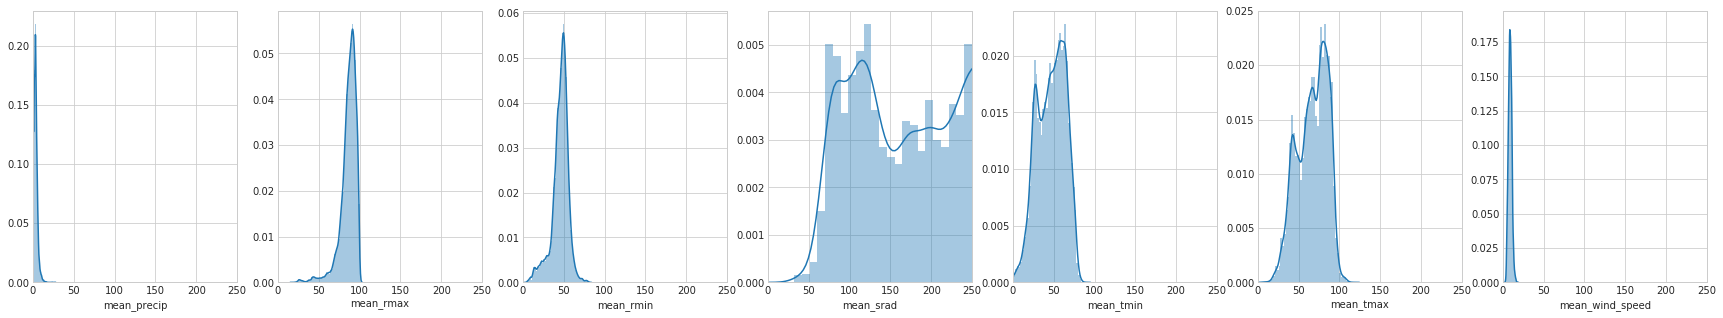

In [0]:
# Understand Variables
variables = weather_cbg_2019_month_sample.drop(["geoid","month"], axis = 1)
fig,ax = plt.subplots(1,7, figsize= (30,5))

for i, variable in enumerate(variables):
  sns.distplot(variables[variable], ax=ax[i])
  ax[i].set_xlim(0,250)

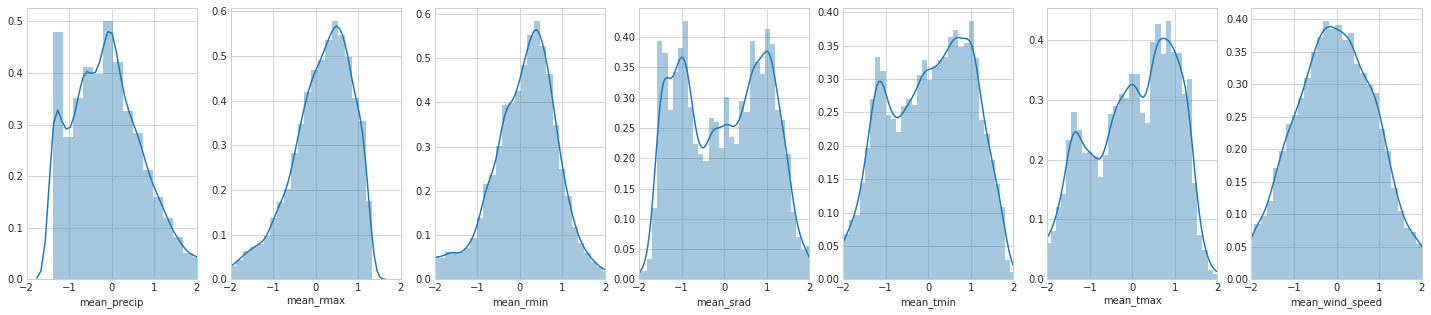

In [0]:
# these distributions are not on the same scale, should standardize them
fix, ax = plt.subplots(1,7,figsize = (25,5))

for i, variable in enumerate(variables):
  original_variables = variables[variable]
  variable_scaled = (original_variables - original_variables.mean())/original_variables.std()
  sns.distplot(variable_scaled, ax=ax[i])
  ax[i].set_xlim(-2,2)

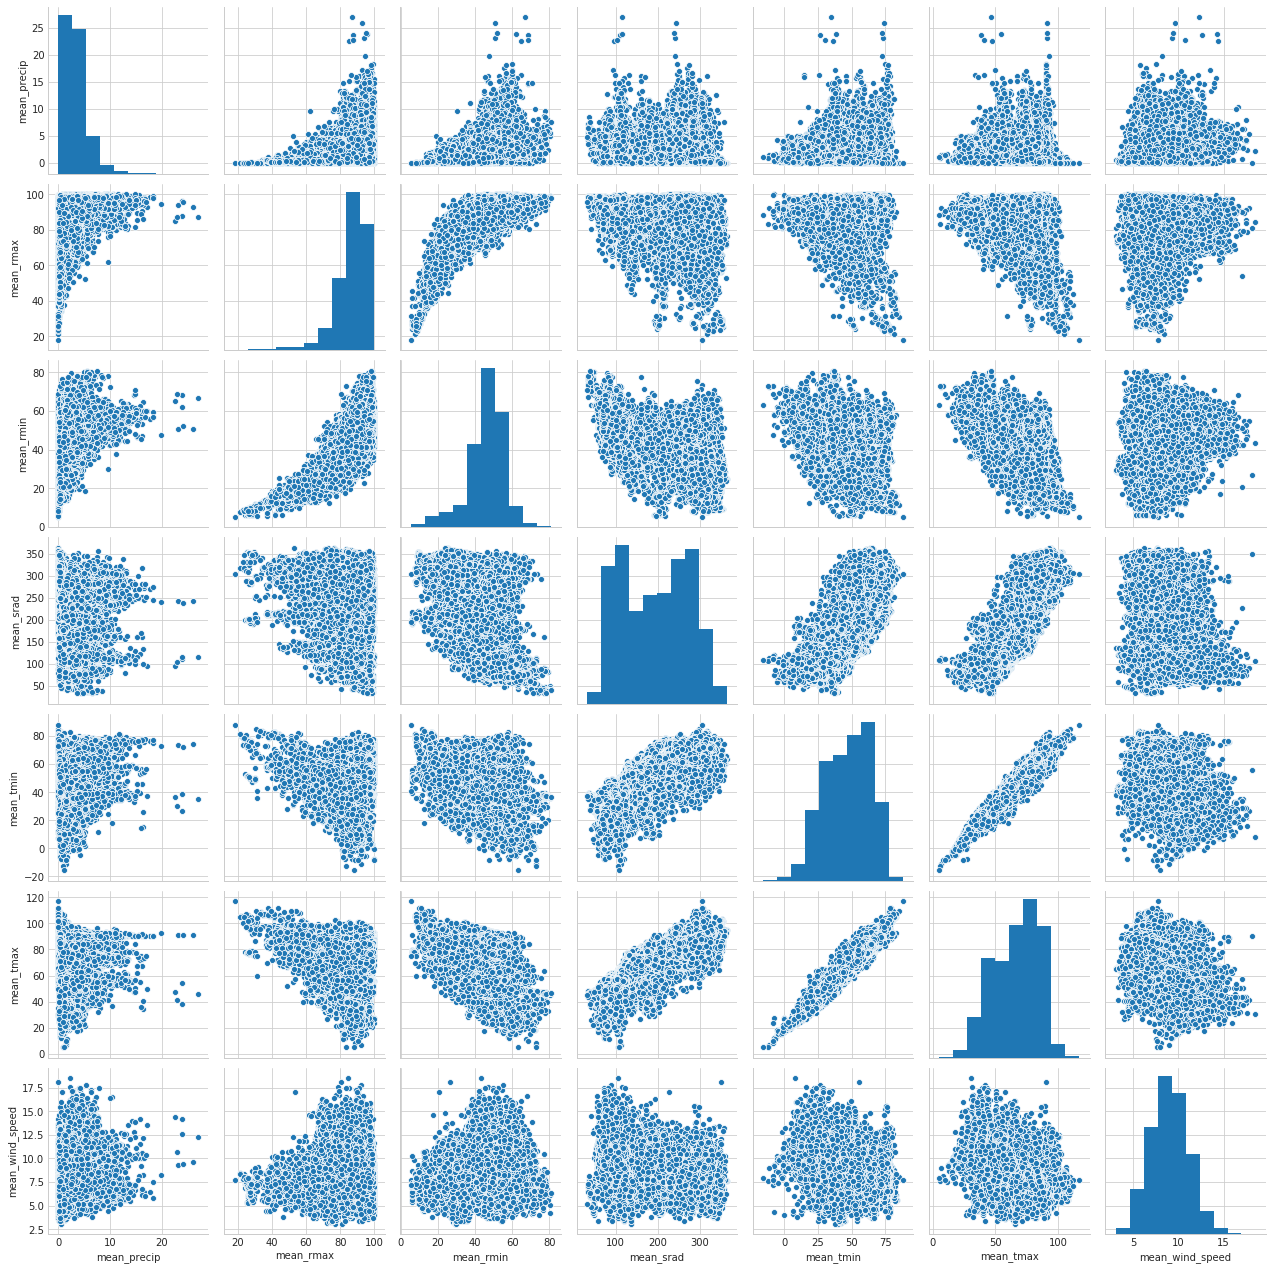

In [0]:
#correlation
sns.pairplot(variables)


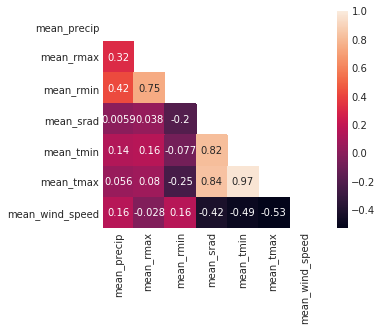

In [0]:
corr = variables.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask,0)] = True
sns.heatmap(corr, mask = mask,square = True, annot = True)

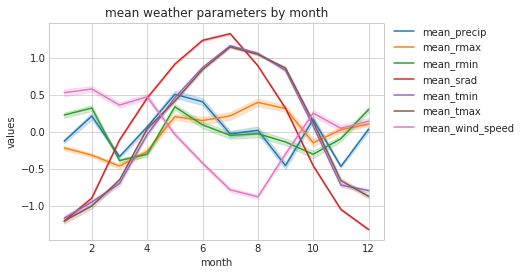

In [0]:
# scaled data by month
for i, variable in enumerate(variables):
  original_variables = variables[variable]
  variable_scaled = (original_variables - original_variables.mean())/original_variables.std()
  sns.lineplot(x = "month", y=variable_scaled, data = weather_cbg_2019_month_sample,legend='brief', label=variable)

plt.ylabel("values")
plt.legend(bbox_to_anchor=(1.02, 1),borderaxespad=0.)
plt.title("mean weather parameters by month")

  

In [0]:
# eventually join the tables together, and plot it on the Us map

# geo_id = ('''select geo_id,
#                     concat("(",latitude,",",longtitude,")")
#               from default.cbg_geographic''')

# # note this county is based on county Fips number which assumed to be consistent with the data source
# import plotly.express as px
# geoid = weather_cbg_2019_month_sample.geoid.unique()
# month = weather_cbg_2019_month_sample.month.unique()
# fig = px.choropleth(weather_cbg_2019_month_sample, geojson=geo_id , locations='geoid', color='mean_precip',
#                            color_continuous_scale= "viridis",
#                            range_color=(0, 5),
                           
#                           )
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# fig.show()


In [0]:
8fad368543a837ce8c9b0c58f3c55b6b565fbea6 
